<a href="https://colab.research.google.com/github/aayRJ23/VisualCryptoGraphy-Receiver-s-Code-MajorProject/blob/main/VisualCrypto_Receiver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RECEIVER'S CODE

Import all dependencies

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

Function to upload quadrants

In [ ]:
def upload_quadrants():
    print("Please upload the 4 quadrants.")
    uploaded_files = files.upload()
    quadrants = []
    for file_name in sorted(uploaded_files.keys()):  # Sort the keys to ensure correct order
        quadrant = cv2.imdecode(np.frombuffer(uploaded_files[file_name], np.uint8), cv2.IMREAD_GRAYSCALE)
        quadrants.append(quadrant)
    return quadrants

Function to sort quadrants

In [ ]:
def sort_quadrants(quadrants):
    def get_quadrant_id(quadrant):
        return int(quadrant[0, 0] & 1)
    return sorted(quadrants, key=get_quadrant_id)

Function to combine quadrants into original image

In [ ]:
def combine_quadrants(quadrants):
    combined_image = np.vstack((np.hstack((quadrants[0], quadrants[1])), np.hstack((quadrants[2], quadrants[3]))))
    return combined_image

Function to extract text from image

In [ ]:
def extract_text_from_image(image):
    flat_image = image.flatten()
    binary_text = ''

    for byte in flat_image:
        binary_text += str(byte & 1)

    all_bytes = [binary_text[i:i+8] for i in range(0, len(binary_text), 8)]
    message = ''
    for byte in all_bytes:
        if byte == '00000000':  # Delimiter
            break
        message += chr(int(byte, 2))

    return message

**Main Script Execution**

Please upload the 4 quadrants.


Saving embedded_quadrant_4.png to embedded_quadrant_4 (2).png
Saving embedded_quadrant_3.png to embedded_quadrant_3 (2).png
Saving embedded_quadrant_2.png to embedded_quadrant_2 (2).png
Saving embedded_quadrant_1.png to embedded_quadrant_1 (2).png


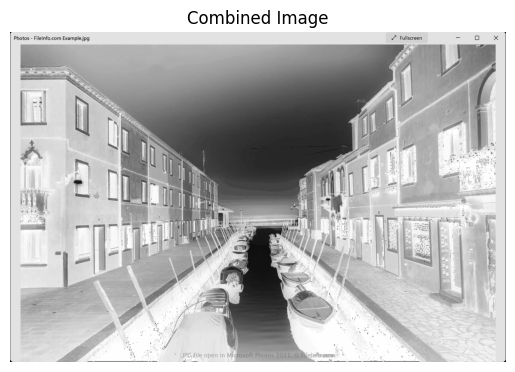


Extracted Message:
HELLO EVERYONE ? HOW ARE YOU ALL ?




In [ ]:
quadrants = upload_quadrants()

if len(quadrants) == 4:
    # Sort the quadrants
    sorted_quadrants = sort_quadrants(quadrants)

    # Combine quadrants into original image
    combined_image = combine_quadrants(sorted_quadrants)

    # Display the combined image
    plt.imshow(combined_image, cmap='gray')
    plt.title('Combined Image')
    plt.axis('off')
    plt.show()

    # Extract the hidden message from the combined image
    extracted_message = extract_text_from_image(combined_image).strip('\x00')
    print("\nExtracted Message:")
    print(extracted_message.upper())  # Print extracted text in upper case
    print("\n")
    print("=" * 50)  # Adding a separator for clarity
else:
    print("Error: Please upload all 4 quadrants of the embedded image.")
